# Silhouette Coefficient 

It is metric used to calculate the goodness of a clustering technique. Its value ranges from $-1$ to $1$.

where - 
 1. 1: Means clusters are well apart from each other and clearly distinguished.
 2. 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
 3. -1: Means clusters are assigned in the wrong way.
 
$$Silhouette \ Score = \frac{(b-a)}{max(a,b)}$$

where - 
 1. a = average intra-cluster distance i.e the average distance between each point within a cluster.
 2. b = average inter-cluster distance i.e the average distance between all clusters.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) #converting into data frame for ease

In [ ]:
sns.scatterplot(Z[0],Z[1])

In [ ]:
KMean= KMeans(n_clusters=2)
KMean.fit(Z)
label=KMean.predict(Z)

In [ ]:
print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')

In [ ]:
sns.scatterplot(Z[0],Z[1],hue=label)

# Assignment

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/Users/akash/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/akash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


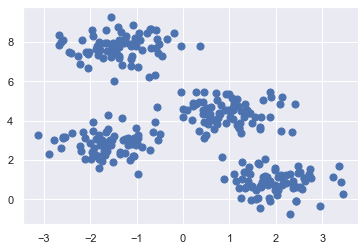

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [3]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
silhouette_score(X, y_kmeans)

0.6819938690643478

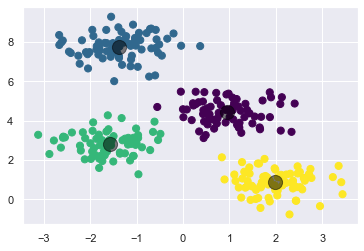

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# MNSIT Data

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [7]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [8]:
silhouette_score(digits.data, clusters)

0.18249069204151275

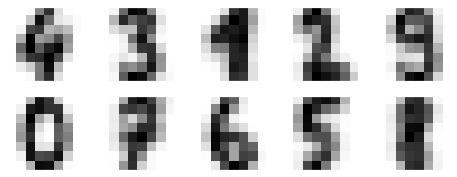

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [10]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

Text(89.18, 0.5, 'predicted label')

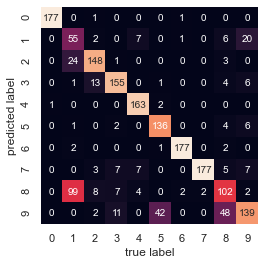

In [12]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Silhouette Score for TSNE(n=2): 0.6368662714958191


0.9371174179187535

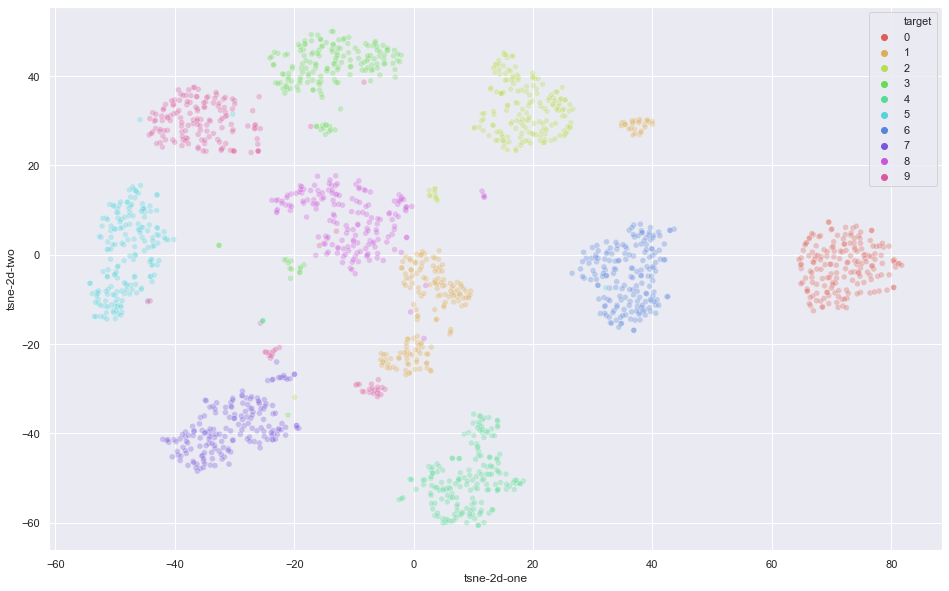

In [14]:
from sklearn.manifold import TSNE
import pandas as pd

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

tsne_df = pd.DataFrame(digits_proj)
tsne_df.columns = ['tsne-2d-one', 'tsne-2d-two']
tsne_df['target'] = digits.target

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 10),
    data=tsne_df,
    legend="full",
    alpha=0.3
)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

print(f'Silhouette Score for TSNE(n=2): {silhouette_score(digits_proj, clusters)}')

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

# K - means with PCA

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

from sklearn.decomposition import (PCA, IncrementalPCA,
                                   KernelPCA, TruncatedSVD,
                                   FastICA, MiniBatchDictionaryLearning,
                                   SparsePCA)

from sklearn.manifold import (Isomap,
                              LocallyLinearEmbedding)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.random_projection import (GaussianRandomProjection,
                                       SparseRandomProjection)

from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
                               
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
# Load Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Parameters
dim = len(X[0])
n_classes = len(np.unique(y))
n_neighbors = 10
random_state = 0

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.7, stratify=y,
                     random_state=random_state)

In [17]:
# PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2,
                        random_state=random_state))

# Incremental PCA
inc_pca = make_pipeline(StandardScaler(),
                        IncrementalPCA(n_components=2))

# Kernel PCA
kpca = make_pipeline(StandardScaler(),
                     KernelPCA(kernel="cosine",
                               n_components=2,
                               gamma=None,
                               fit_inverse_transform=True,
                               random_state=random_state,
                               n_jobs=1))

# Sparse PCA
sparsepca = make_pipeline(StandardScaler(),
                          SparsePCA(n_components=2,
                                    alpha=0.0001,
                                    random_state=random_state,
                                    n_jobs=-1))

# Singular Value Decomposition
SVD = make_pipeline(StandardScaler(),
                    TruncatedSVD(n_components=2,
                                 algorithm='randomized',
                                 random_state=random_state,
                                 n_iter=5))
# Gaussian Random Projection
GRP = make_pipeline(StandardScaler(),
                    GaussianRandomProjection(n_components=2,
                                             eps = 0.5,
                                             random_state=random_state))

# Linear Discriminant Analysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Neighborhood Component Analysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Sparse Random Projection
SRP = make_pipeline(StandardScaler(),
                    SparseRandomProjection(n_components=2,
                                           density = 'auto',
                                           eps = 0.5,
                                           random_state=random_state,
                                           dense_output = False))

# ISOMAP
isomap = make_pipeline(StandardScaler(),
                       Isomap(n_components=2,
                              n_jobs = 4,
                              n_neighbors = 5))

# MiniBatch Dictionary Learning
miniBatchDictLearning = make_pipeline(StandardScaler(),
                                      MiniBatchDictionaryLearning(
                                          n_components=2,
                                          batch_size = 200,
                                          alpha = 1,
                                          n_iter = 25,
                                          random_state=random_state))

# Independent Component Analysis
ICA = make_pipeline(StandardScaler(),
                    FastICA(n_components=2,
                            algorithm = 'parallel',
                            whiten = True,
                            max_iter = 100,
                            random_state=random_state))

# Locally Linear Embedding
lle = make_pipeline(StandardScaler(),
                    LocallyLinearEmbedding(n_components=2,
                                           n_neighbors = 10,
                                           method = 'modified',
                                           n_jobs = 4,
                                           random_state=random_state))

# Nearest Neighbor Classifier
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

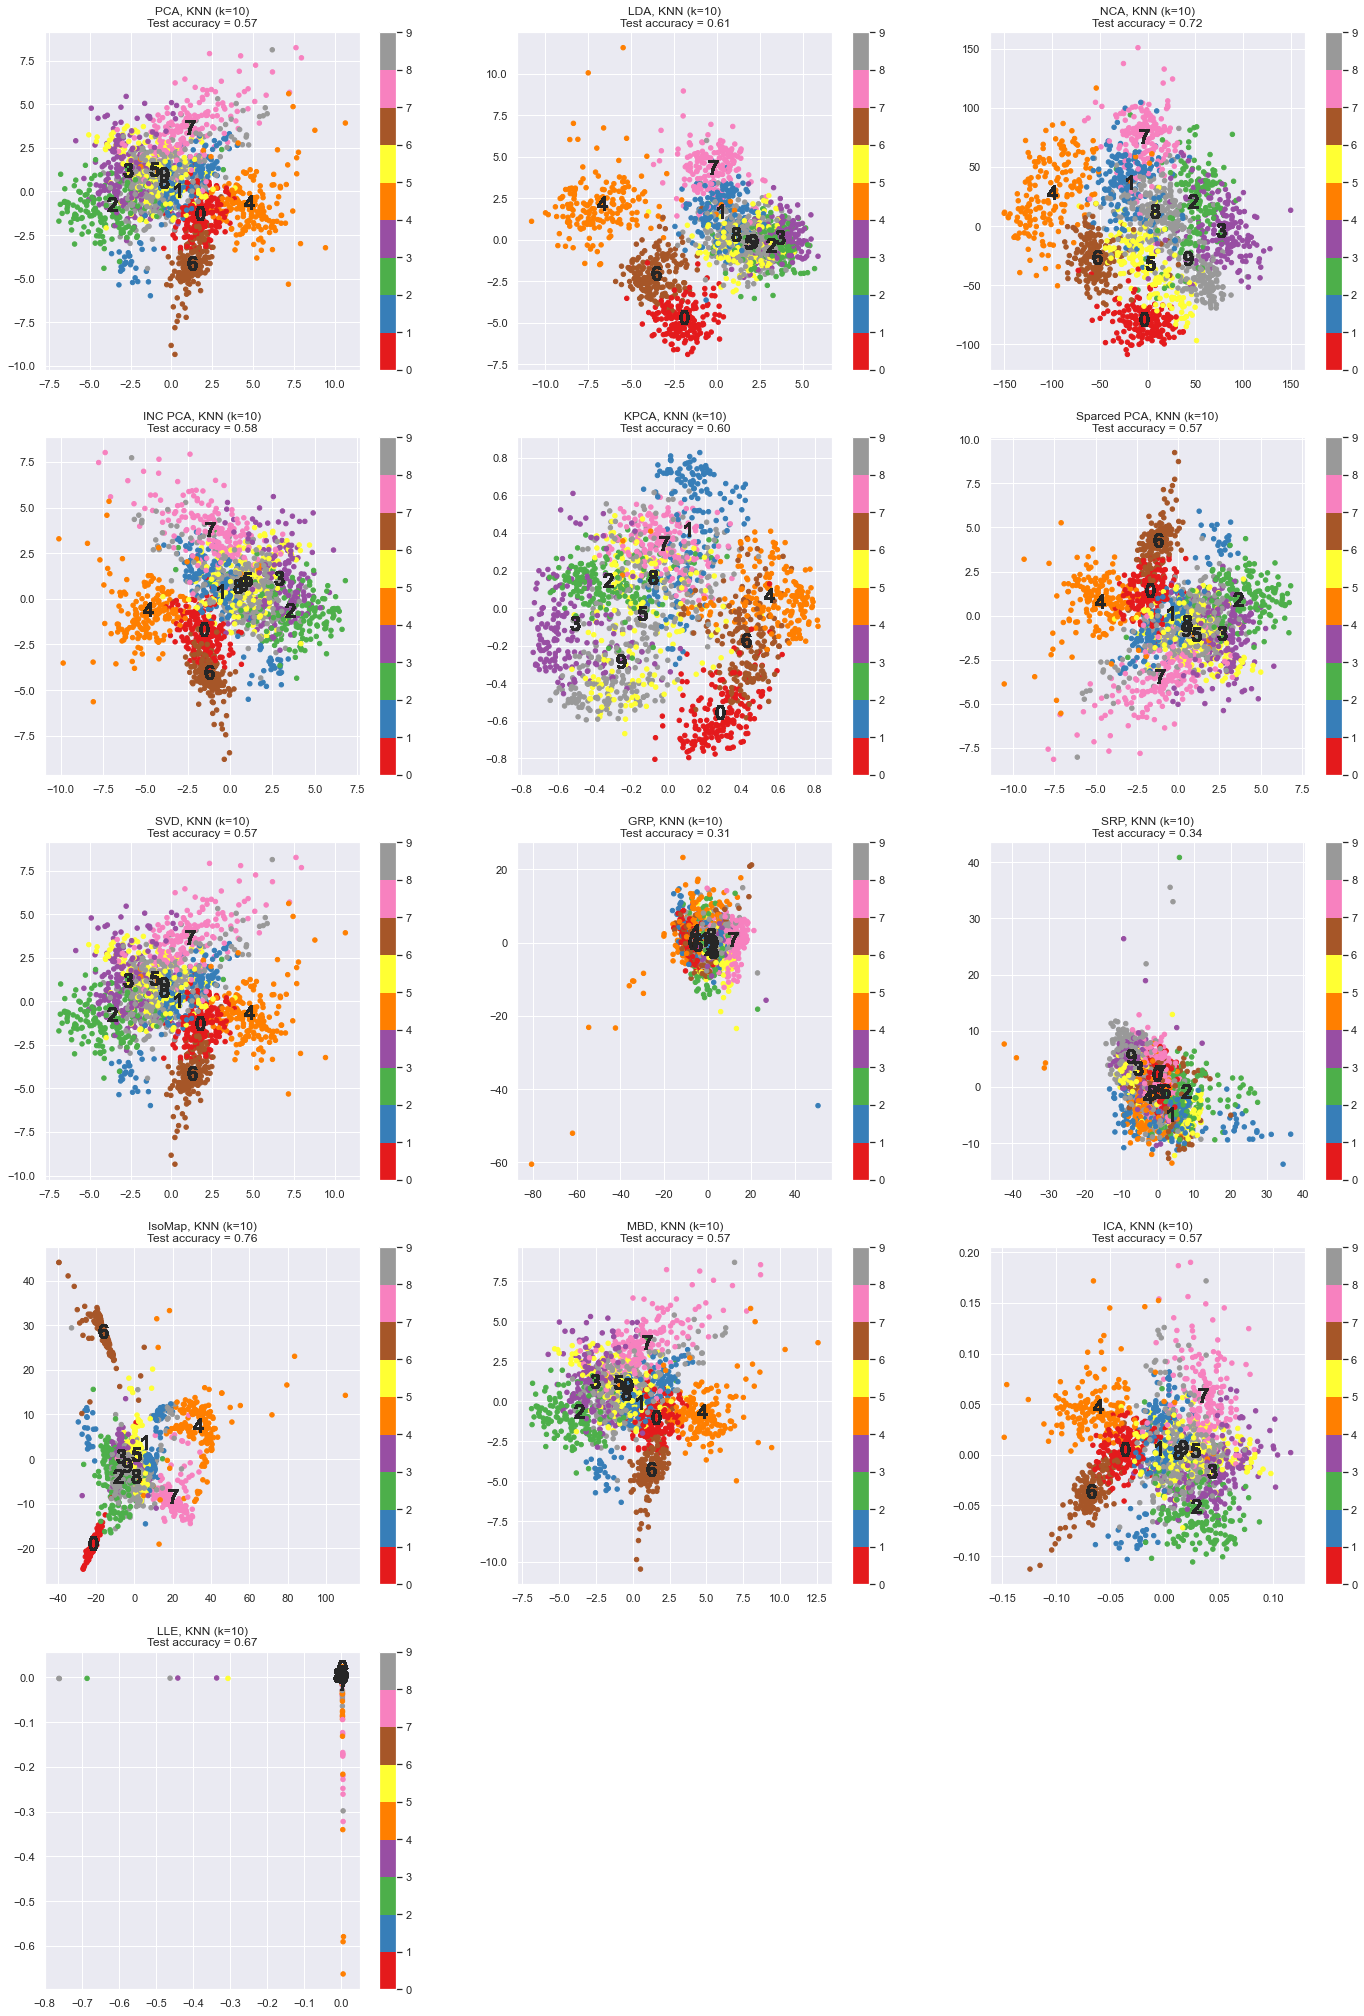

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Make a list of the methods to be compared
dim_reduction_methods = {'PCA': pca, 
                         'LDA': lda, 
                         'NCA': nca, 
                         'INC PCA': inc_pca, 
                         'KPCA':kpca, 
                         'Sparced PCA': sparsepca, 
                         'SVD': SVD, 
                         'GRP' : GRP, 
                         'SRP': SRP, 
                         'IsoMap': isomap, 
                         'MBD': miniBatchDictLearning, 
                         'ICA': ICA, 
                         'LLE': lle
                        }


plt.figure(figsize=(24, 36))

for j,(name, model) in enumerate(dim_reduction_methods.items()):
    plt.subplot(5, 3, j + 1, aspect='auto')

    # Fit the method's model
    model.fit(X_train, y_train)
    
    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Fit the methons using the fitted model
    X_embedded = model.transform(X)
    
    # Creating a dataframe to easily plot the sample label
    df = pd.DataFrame(np.concatenate((X_embedded, np.reshape(y, (-1, 1))), axis=1))

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=20, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
    plt.colorbar()
    
    # Label the data distributions
    for i, number in enumerate(y_test):
        plt.annotate(number,
                     df.loc[df[2]==number,[0,1]].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     weight='bold',
                     size='20')
    
plt.show()